In [12]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from collections import Counter
%matplotlib inline
import plotly.express as px
import tkinter
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，中文显示
plt.rcParams['axes.unicode_minus'] = False   # 坐标轴负数的负号显示
# 设置字体为新罗马字体
font = {'family': 'serif', 'serif': ['Times New Roman'], 'style': 'normal'}
plt.rc('font', **font)
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'


In [48]:
import numpy as np
import pandas as pd
import pandasgui

df = pd.read_csv("4final_1min.csv")
# 使用pandasgui显示DataFrame

In [49]:
df1 = pd.read_csv("4final_1min.csv")

In [50]:
df1

,start_time,end_time,cars,trucks,vehicle_sum
0,12:56:00,12:56:59,42,3,45
1,12:57:00,12:57:59,76,15,91
2,12:58:00,12:58:59,69,33,102
3,12:59:00,12:59:59,64,24,88
4,13:00:00,13:00:59,74,11,85
...,...,...,...,...,...
139,15:15:00,15:15:59,55,5,60
140,15:16:00,15:16:59,58,10,68
141,15:17:00,15:17:59,46,4,50
142,15:18:00,15:18:59,36,3,39


pandasgui.show(df)

In [51]:
df

,start_time,end_time,cars,trucks,vehicle_sum
0,12:56:00,12:56:59,42,3,45
1,12:57:00,12:57:59,76,15,91
2,12:58:00,12:58:59,69,33,102
3,12:59:00,12:59:59,64,24,88
4,13:00:00,13:00:59,74,11,85
...,...,...,...,...,...
139,15:15:00,15:15:59,55,5,60
140,15:16:00,15:16:59,58,10,68
141,15:17:00,15:17:59,46,4,50
142,15:18:00,15:18:59,36,3,39


In [52]:
df['start_time']

0      12:56:00
1      12:57:00
2      12:58:00
3      12:59:00
4      13:00:00
         ...   
139    15:15:00
140    15:16:00
141    15:17:00
142    15:18:00
143    15:19:00
Name: start_time, Length: 144, dtype: object

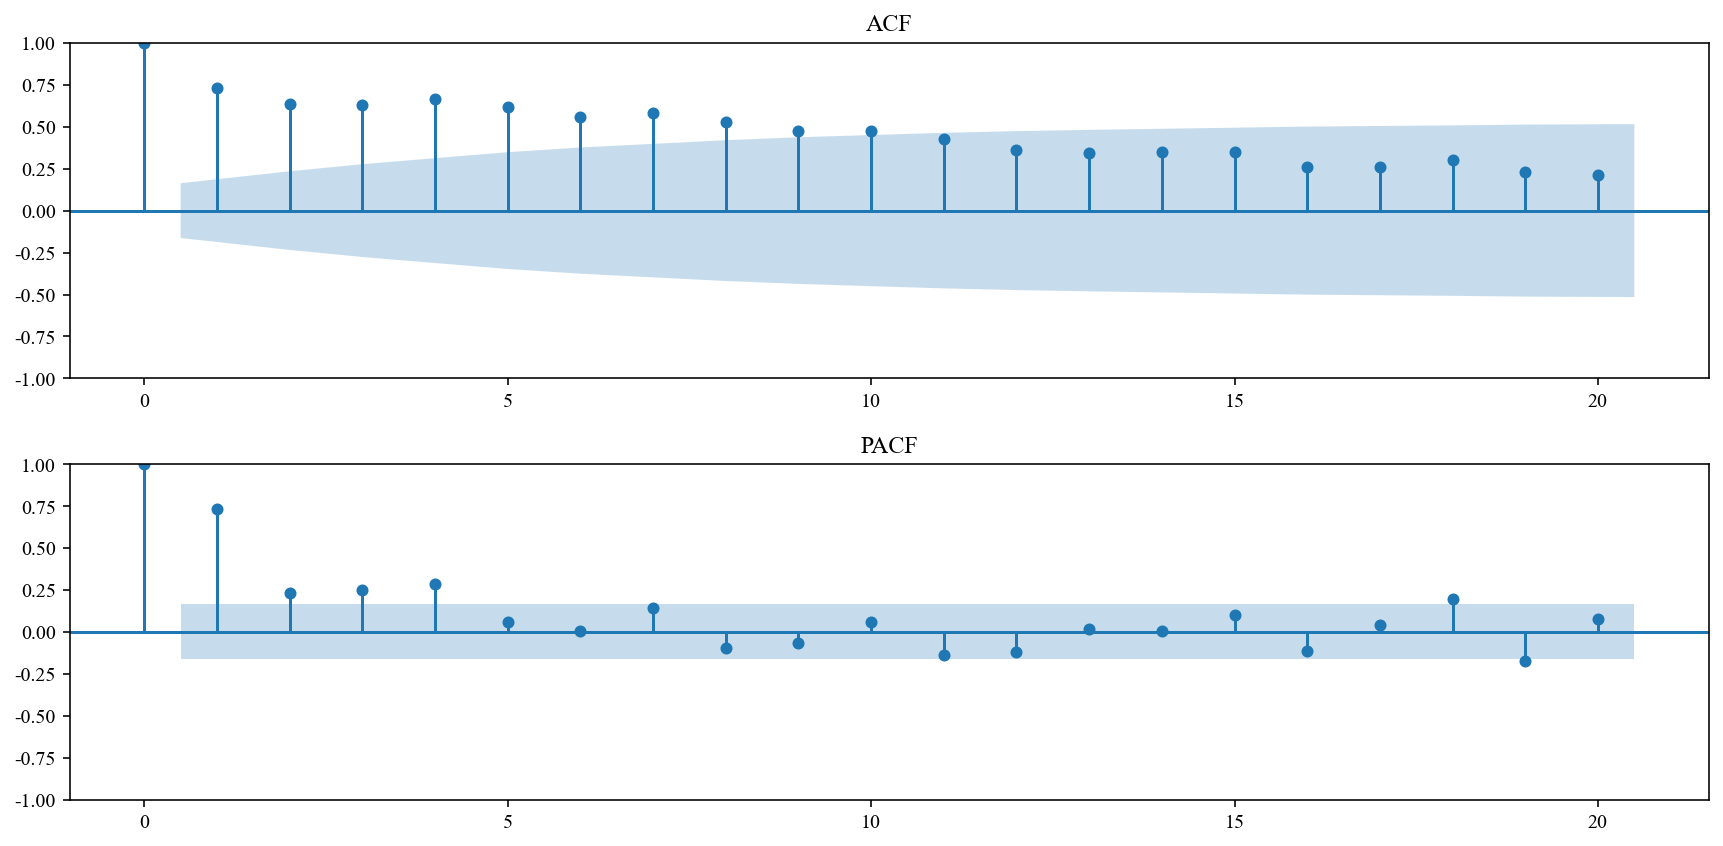

ADF Statistic: -1.559437951338403
p-value: 0.5039305104093759
Critical Values:
   1%: -3.4779446621720114
   5%: -2.8824156122448983
   10%: -2.577901887755102

Ljung-Box Test Result:
       lb_stat      lb_pvalue
20  694.647773  3.001715e-134


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

# 假设 df1 已经加载
df1['start_time'] = pd.to_datetime(df1['start_time'], format='%H:%M:%S')
df1.set_index('start_time', inplace=True)

# 绘制 ACF 和 PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(df1['vehicle_sum'], lags=20, ax=plt.gca())
plt.title('ACF')

plt.subplot(2, 1, 2)
plot_pacf(df1['vehicle_sum'], lags=20, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()
# 平稳性检验 (ADF 测试)
adf_result = adfuller(df1['vehicle_sum'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# 纯随机性检验 (Ljung-Box 测试)
ljung_box_result = acorr_ljungbox(df1['vehicle_sum'], lags=[20], return_df=True)
print('\nLjung-Box Test Result:')
print(ljung_box_result)


In [72]:
df2= pd.read_csv("4final_5min.csv")

In [73]:
df2

,start_time,end_time,truckss,car,vehicle_sum
0,12:55:00,12:59:00,34,240,274
1,13:00:00,13:04:00,44,363,407
2,13:05:00,13:09:00,28,424,452
3,13:10:00,13:14:00,52,322,374
4,13:15:00,13:19:00,27,222,249
5,13:20:00,13:24:00,25,255,280
6,13:25:00,13:29:00,37,307,344
7,13:30:00,13:34:00,44,366,410
8,13:35:00,13:39:00,81,445,526
9,13:40:00,13:44:00,78,495,573


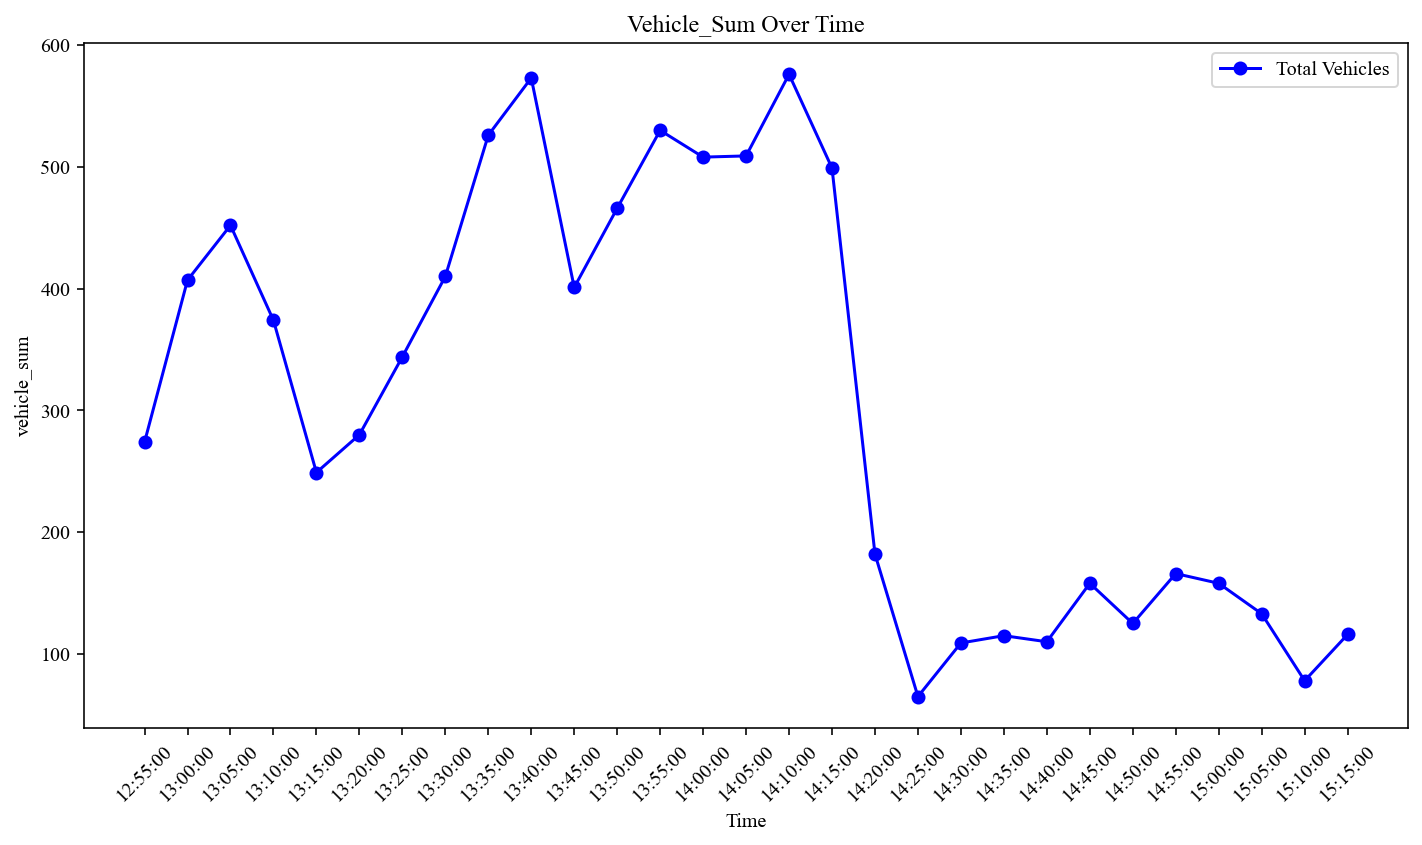

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保time列格式正确，忽略微秒部分
df2['start_time'] = pd.to_datetime(df2['start_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

# 绘制折线图，x轴为time，y轴为all
plt.figure(figsize=(10, 6))
plt.plot(df2['start_time'], df2['vehicle_sum'], marker='o', color='b', linestyle='-', label='Total Vehicles')

# 设置x轴和y轴标签
plt.xlabel('Time')
plt.ylabel('vehicle_sum')
plt.title('Vehicle_Sum Over Time')

# 旋转x轴标签
plt.xticks(rotation=45)

# 添加图例
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

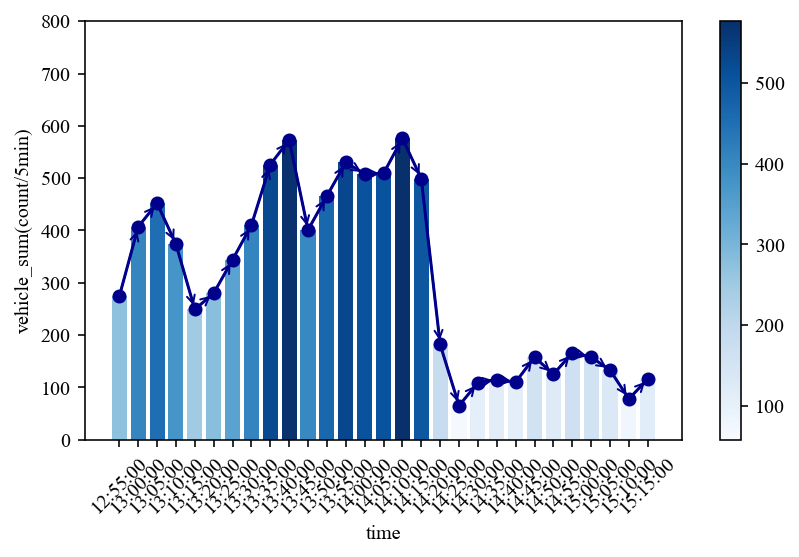

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# 假设df是已经加载的DataFrame，并且包含'start_time'和'unique_vehicle_count'列

# 确保time列格式正确，忽略微秒部分
df2['start_time'] = pd.to_datetime(df2['start_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

# 使用更高分辨率的colormap颜色映射，并加深最小值颜色
cmap = cm.get_cmap('Blues', 256)  # 使用256个颜色细化渐变
norm = Normalize(vmin=min(df2['vehicle_sum']) * 0.9, vmax=max(df2['vehicle_sum']))

# 将数值映射到颜色
colors = cmap(norm(df2['vehicle_sum']))

# 创建柱状图
plt.bar(df2['start_time'], df2['vehicle_sum'], color=colors)

# 在柱状图上叠加折线图，并加上箭头
plt.plot(df2['start_time'], df2['vehicle_sum'], marker='o', color='darkblue', linestyle='-', label='交通流量变化')

# 为每个折线节点添加箭头，不包括最后一个元素
for i in range(len(df2['start_time']) - 1):
    plt.annotate('', xy=(df2['start_time'].iloc[i+1], df2['vehicle_sum'].iloc[i+1]), 
                 xytext=(df2['start_time'].iloc[i], df2['vehicle_sum'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='darkblue'))


# 添加标题和标签
plt.xlabel('time')
plt.ylabel('vehicle_sum(count/5min)')

# 自定义刻度标签
plt.xticks(df2['start_time'], rotation=0)
plt.yticks(np.arange(0, 900, 100))

# 添加颜色条以显示交通量与颜色的对应关系
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)

# 旋转x轴标签
plt.xticks(rotation=45)

# 显示图表
plt.tight_layout()
plt.show()




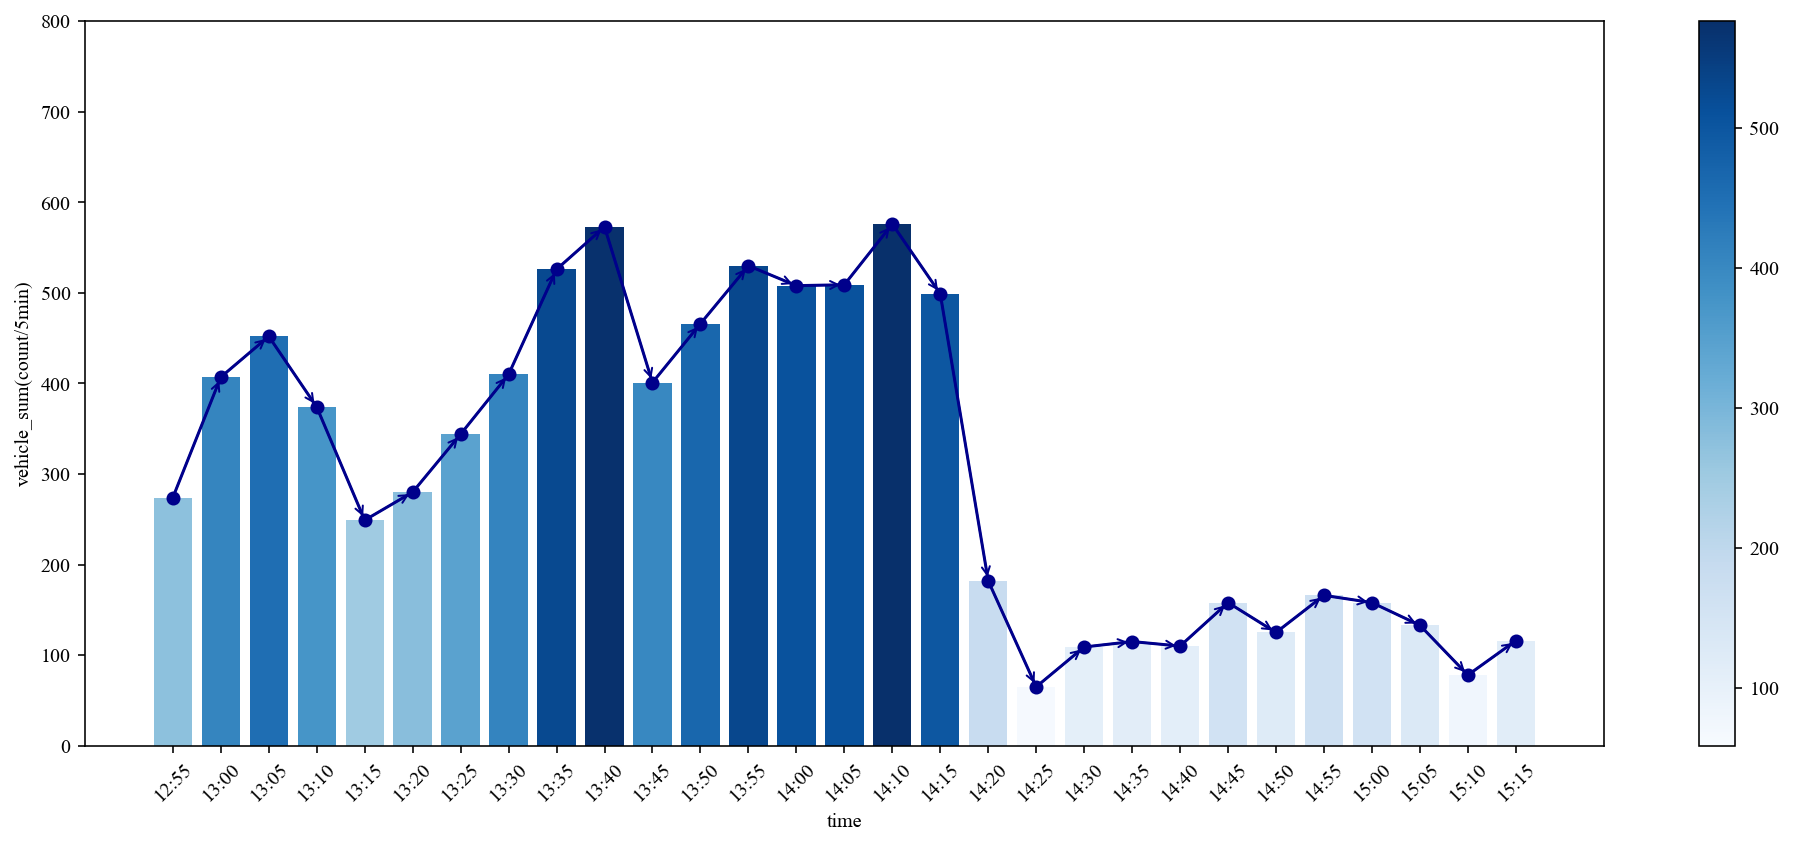

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# 假设df是已经加载的DataFrame，并且包含'start_time'和'unique_vehicle_count'列

# 确保time列格式正确，并忽略秒部分，只显示小时和分钟
df2['start_time'] = pd.to_datetime(df2['start_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M')

# 使用更高分辨率的colormap颜色映射，并加深最小值颜色
cmap = cm.get_cmap('Blues', 256)  # 使用256个颜色细化渐变
norm = Normalize(vmin=min(df2['vehicle_sum']) * 0.9, vmax=max(df2['vehicle_sum']))

# 将数值映射到颜色
colors = cmap(norm(df2['vehicle_sum']))

# 创建图像，设置较宽的figsize
plt.figure(figsize=(14, 6))  # 图片长度变长

# 创建柱状图
plt.bar(df2['start_time'], df2['vehicle_sum'], color=colors)

# 在柱状图上叠加折线图，并加上箭头
plt.plot(df2['start_time'], df2['vehicle_sum'], marker='o', color='darkblue', linestyle='-', label='交通流量变化')

# 为每个折线节点添加箭头，不包括最后一个元素
for i in range(len(df2['start_time']) - 1):
    plt.annotate('', xy=(df2['start_time'].iloc[i+1], df2['vehicle_sum'].iloc[i+1]), 
                 xytext=(df2['start_time'].iloc[i], df2['vehicle_sum'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='darkblue'))

# 添加标题和标签
plt.xlabel('time')
plt.ylabel('vehicle_sum(count/5min)')

# 自定义刻度标签
plt.xticks(df2['start_time'], rotation=45)  # 旋转45度避免标签重叠
plt.yticks(np.arange(0, 900, 100))

# 添加颜色条以显示交通量与颜色的对应关系
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm)

# 显示图表
plt.tight_layout()
plt.show()


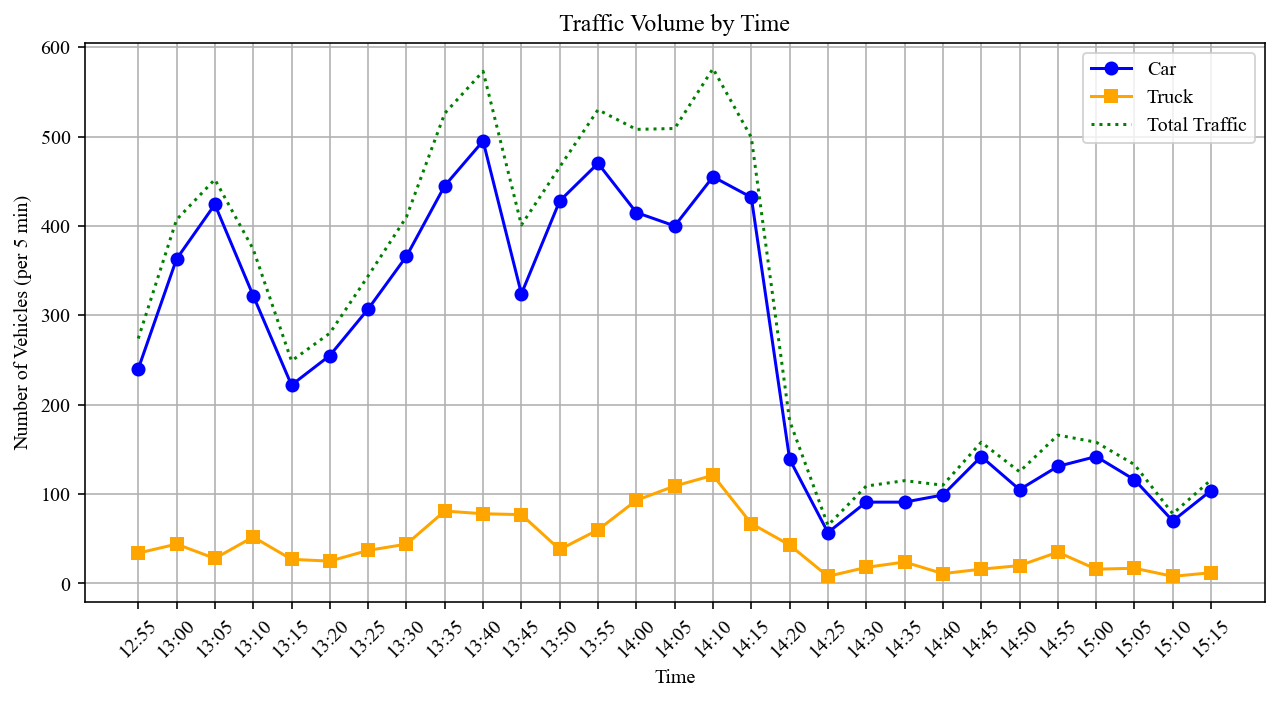

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
df2 = pd.read_csv("4final_5min.csv")

# 确保time列格式正确
df2['start_time'] = pd.to_datetime(df2['start_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M')

# 设置图形大小，宽度加大以减少拥挤
plt.figure(figsize=(9,5))

# 绘制小车流量
plt.plot(df2['start_time'], df2['car'], color='blue', marker='o', label='Car')

# 绘制卡车流量
plt.plot(df2['start_time'], df2['truckss'], color='orange', marker='s', label='Truck')

# 绘制总流量
plt.plot(df2['start_time'], df2['vehicle_sum'], linestyle='dotted', color='green', label='Total Traffic')

# 添加标题和标签
plt.title('Traffic Volume by Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles (per 5 min)')

# 添加图例
plt.legend()

# 添加网格线
plt.grid(True)

# 自定义x轴的刻度，不显示秒
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()
plt.show()


In [10]:
time_lst = [pd.Timestamp("2024-5-1 13:52:36") + pd.Timedelta(seconds=1)*i for i in range(len(df))]
df3["time"] = time_lst